# FASHION MNIST VERİ SETİNİN KAYITLI MODELDEN TAHMİN EDİLMESİ

### Kütüphanelerin Kurulumu

In [1]:
import tensorflow as tf
import tensorflow.keras as kr
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
import random

2025-02-01 09:47:49.295463: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738392469.313089   15899 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738392469.318759   15899 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-01 09:47:49.338121: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Veri Setlerinin İnternetten çekilmesi

In [2]:
(x_train, y_train), (x_test,y_test) = fashion_mnist.load_data()

### Eğitim Veri setimize bakacak olursak :

In [3]:
print("x_train shape", x_train.shape)
print(f"Eğitim örnekleri    : {x_train.shape[0]:,.0f} Adet")

x_train shape (60000, 28, 28)
Eğitim örnekleri    : 60,000 Adet


### Test Veri Setimiz ise:

In [4]:
print("x_test shape", x_test.shape)
print(f"adet Test örnekleri : {x_test.shape[0]:,.0f} Adet")

x_test shape (10000, 28, 28)
adet Test örnekleri : 10,000 Adet


## Veri setine genel bakış

In [5]:
print(f"x_train shape : {x_train.shape} - y_train shape : {y_train.shape}")
print(f"x_test shape  : {x_test.shape} - y_test shape  : {y_test.shape}")

x_train shape : (60000, 28, 28) - y_train shape : (60000,)
x_test shape  : (10000, 28, 28) - y_test shape  : (10000,)


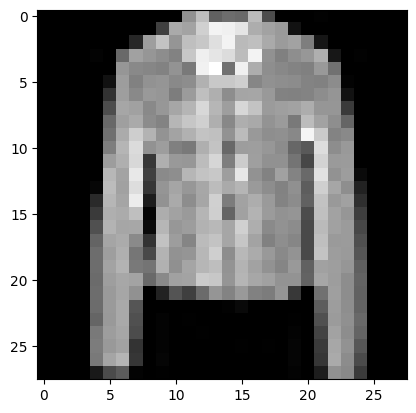

In [6]:
plt.imshow(x_test[10], cmap="gray")

### Sınıflara Türkçe Etiket verelim :

In [7]:
fashion_mnist_labels = np.array(["Tişört/üst",
                                 "Pantolon",
                                 "Kazak",
                                 "Elbise",
                                 "Palto",
                                 "Sandalet",
                                 "Gömlek",
                                 "Spor ayakkabı",
                                 "Çanta",
                                 "Bot"])

In [8]:
model = load_model('fashion_model.keras')

I0000 00:00:1738392471.632392   15899 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6634 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1070, pci bus id: 0000:01:00.0, compute capability: 6.1
I0000 00:00:1738392471.638901   15899 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 6634 MB memory:  -> device: 1, name: NVIDIA GeForce GTX 1070, pci bus id: 0000:02:00.0, compute capability: 6.1


In [9]:
# Test verisinden rastgele bir örnek seçin
random_index = random.randint(0, len(x_test)-1)

In [10]:
test_img = x_test[random_index]
true_label = y_test[random_index]

In [11]:
# Tahmin yap (modelin çıktısı olasılık değerleridir)
prediction = model.predict(test_img.reshape(1, 28, 28, 1))

I0000 00:00:1738392472.838194   16152 service.cc:148] XLA service 0x7f7d88006310 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1738392472.838238   16152 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce GTX 1070, Compute Capability 6.1
I0000 00:00:1738392472.838243   16152 service.cc:156]   StreamExecutor device (1): NVIDIA GeForce GTX 1070, Compute Capability 6.1
2025-02-01 09:47:52.846514: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1738392472.873751   16152 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-02-01 09:47:53.196440: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{} for conv (f32[1,32,11,11]{3,2,1,0}, u8[0]{0}) custom-call(f32[1,32,13,13]{3,2,1,0}, f32[32,32,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 731ms/step


I0000 00:00:1738392473.469660   16152 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [12]:
# Tahmin edilen sınıfı al
predicted_class = np.argmax(prediction)
predicted_class

np.int64(6)

In [13]:
# Gerçek sınıfı ve tahmin edilen sınıfı yazdır
print(f"Gerçek sınıf: {true_label}, Tahmin edilen sınıf: {predicted_class}")

Gerçek sınıf: 6, Tahmin edilen sınıf: 6


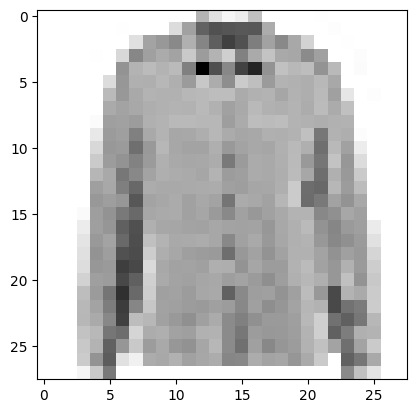

In [14]:
# Görseli görüntüle
plt.imshow(test_img.reshape(28, 28), cmap=cm.binary)
plt.show()

In [15]:
img_rows, img_cols = 28, 28

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━

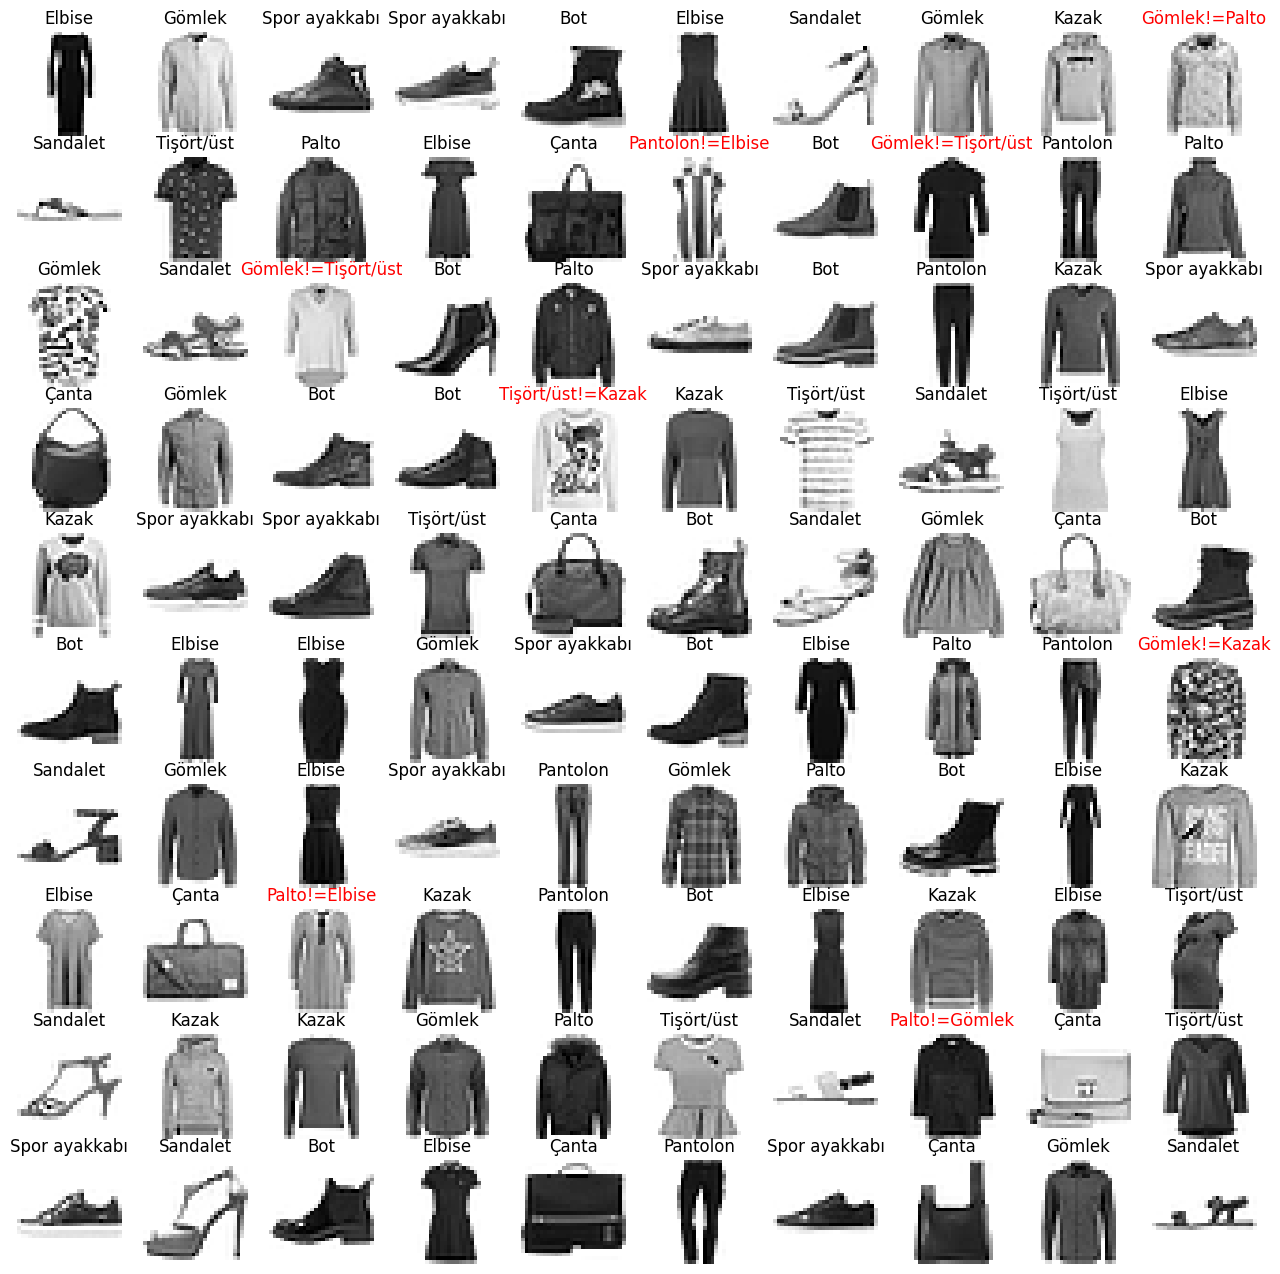

In [16]:
right = 0
mistake = 0
plt.figure(figsize=(16,16))
for i in range(100):
    random_index = random.randint(0, len(x_test) - 1)
    test_image = x_test[random_index]
    true_label = y_test[random_index]

    plt.subplot(10, 10, i+1)
    plt.imshow(test_image,  cmap=cm.gray_r)
    plt.axis('off')

    # Tahmin yap (modelin çıktısı olasılık değerleridir)
    pred = model.predict(test_image.reshape(1, img_rows, img_cols, 1))
    predicted_class = np.argmax(pred)

    # Gerçek sınıfı ve tahmin edilen sınıfı yazdır
    #print(f"Gerçek sınıf: {true_label}, Tahmin edilen sınıf: {predicted_class}")
    if true_label == predicted_class:
        plt.title(fashion_mnist_labels[predicted_class])
        right += 1
    else:
        #tahmin edilen sınıf != gerçek sınıf
        plt.title(fashion_mnist_labels[predicted_class] + "!=" + fashion_mnist_labels[true_label], color='#ff0000')
        mistake += 1

# Görseli görüntüle
plt.imshow(test_image.reshape(img_rows, img_cols), cmap=cm.binary)
plt.show()

In [17]:
print("Doğru tahminlerin sayısı:", right)
print("Hata sayısı:", mistake)
print("Doğru tahmin oranı:", right/(mistake + right)*100, '%')

Doğru tahminlerin sayısı: 92
Hata sayısı: 8
Doğru tahmin oranı: 92.0 %
